In [1]:
import calendar
import gspread
import gspread_dataframe
import gspread_pandas
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import scipy.stats
import statistics

In [2]:
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('/media/gershie/Data/Google Drive/client_secret.json', scope)
#creds = ServiceAccountCredentials.from_json_keyfile_name('g:/Google Drive/client_secret.json', scope)
client = gspread.authorize(creds)

# Find a workbook by name and open the first sheet
# Make sure you use the right name here.
spreadsheet = client.open_by_key("1Lugjj5HtwjbIq7ExPue2SFXhuyz28hokXLX-u4gPpPM")
sheet = spreadsheet.worksheet("Summary")
summary_orig = gspread_dataframe.get_as_dataframe(spreadsheet.worksheet("Summary"))

# Data

In [3]:
summary = summary_orig.copy()[summary_orig["Year"] >= 1934]
summary["Year"] = summary["Year"].astype(int)
summary = summary.set_index("Year")
current_year = max(summary.index)+1
summary

DJIA (% change)  TSX (% change)  MSCI World Index  \
Year                                                      
1934         4.140000             NaN               NaN   
1935        38.530000             NaN               NaN   
1936        24.820000             NaN               NaN   
1937       -32.820000             NaN               NaN   
1938        28.060000             NaN               NaN   
...               ...             ...               ...   
2018        -5.630000      -11.637084             -8.20   
2019        15.160000       14.548072             28.40   
2020        13.930064        6.258472             16.50   
2021        18.727472       17.999628             22.35   
2022       -11.801350       -5.604799            -13.30   

      MSCI Emerging Markets (% change)  Canada Inflation (%)  US Inflation  \
Year                                                                         
1934                               NaN                   NaN      1.515152   
1935                               NaN                   NaN      2.985075   
1936                               NaN                   NaN      1.449275   
1937                               NaN                   NaN      2.857143   
1938                               NaN                   NaN     -2.777778   
...                                ...                   ...           ...   
2018                             -10.3              1.546193      1.910159   
2019                              21.0              1.949025      2.285130   
2020                               8.5              0.735294      1.362005   
2021                               5.8              3.813516      4.700000   
2022                             -28.8              6.900000      8.200000   

      Canada long term benchmark bonds  Canada 1 to 3 years marketable bonds  \
Year                                                                           
1934                               NaN                                   NaN   
1935                               NaN                                   NaN   
1936                               NaN                                   NaN   
1937                               NaN                                   NaN   
1938                               NaN                                   NaN   
...                                ...                                   ...   
2018                          2.278353                              1.962800   
2019                          2.357160                              1.616360   
2020                          1.801880                              0.504343   
2021                          1.213108                              0.455904   
2022                          1.852008                              2.614545   

      Canada 3 to 5 years marketable bonds  \
Year                                         
1934                                   NaN   
1935                                   NaN   
1936                                   NaN   
1937                                   NaN   
1938                                   NaN   
...                                    ...   
2018                              2.113480   
2019                              1.552120   
2020                              0.559960   
2021                              0.830402   
2022                              2.644798   

      Canada 5 to 10 years marketable bonds  \
Year                                          
1934                                    NaN   
1935                                    NaN   
1936                                    NaN   
1937                                    NaN   
1938                                    NaN   
...                                     ...   
2018                               2.233360   
2019                               1.567120   
2020                               0.677530   
2021                               1.236466   
2022               

In [4]:
measures = [c for c in summary.columns if c not in ["Year"]]
summary.corr()

DJIA (% change)  TSX (% change)  \
DJIA (% change)                               1.000000        0.683633   
TSX (% change)                                0.683633        1.000000   
MSCI World Index                              0.854565        0.765893   
MSCI Emerging Markets (% change)              0.519673        0.743065   
Canada Inflation (%)                         -0.205384       -0.037351   
US Inflation                                 -0.289053        0.049863   
Canada long term benchmark bonds              0.119499        0.098224   
Canada 1 to 3 years marketable bonds          0.016943       -0.085947   
Canada 3 to 5 years marketable bonds          0.027827       -0.058316   
Canada 5 to 10 years marketable bonds         0.038191       -0.038031   
Canada 10+ years marketableb bonds            0.051594       -0.024084   
Canada prime interest rate                   -0.021495       -0.041374   
US prime interest rate                       -0.028401        0.011184   
US 1 Year                                    -0.057546        0.018102   
US 5 Year                                    -0.018378        0.017168   
US 10 Year                                    0.002466        0.024782   
US 30 Year                                    0.039397        0.072940   

                                       MSCI World Index  \
DJIA (% change)                                0.854565   
TSX (% change)                                 0.765893   
MSCI World Index                               1.000000   
MSCI Emerging Markets (% change)               0.617819   
Canada Inflation (%)                          -0.058944   
US Inflation                                  -0.131004   
Canada long term benchmark bonds               0.173267   
Canada 1 to 3 years marketable bonds          -0.141641   
Canada 3 to 5 years marketable bonds          -0.131154   
Canada 5 to 10 years marketable bonds         -0.119966   
Canada 10+ years marketableb bonds            -0.107336   
Canada prime interest rate                     0.023918   
US prime interest rate                         0.009358   
US 1 Year                                      0.034028   
US 5 Year                                      0.060470   
US 10 Year                                     0.077622   
US 30 Year                                     0.109876   

                                       MSCI Emerging Markets (% change)  \
DJIA (% change)                                                0.519673   
TSX (% change)                                                 0.743065   
MSCI World Index                                               0.617819   
MSCI Emerging Markets (% change)                               1.000000   
Canada Inflation (%)                                           0.045259   
US Inflation                                                   0.068915   
Canada long term benchmark bonds                               0.256521   
Canada 1 to 3 years marketable bonds                           0.040969   
Canada 3 to 5 years marketable bonds                           0.058804   
Canada 5 to 10 years marketable bonds                          0.080401   
Canada 10+ years marketableb bonds                             0.101567   
Canada prime interest rate                                     0.152791   
US prime interest rate                                         0.128754   
US 1 Year                                                      0.139902   
US 5 Year                                                      0.186142   
US 10 Year                                                     0.208946   
US 30 Year                                                     0.198105   

                                       Canada Inflation (%)  US Inflation  \
DJIA (% change)                                   -0.205384     -0.289053   
TSX (% change)                                    -0.037351      0.049863   
MSCI World Index                                  -0.058944  

DJIA (% change)                           7.957261
TSX (% change)                            6.726863
MSCI World Index                         11.070755
MSCI Emerging Markets (% change)         14.360000
Canada Inflation (%)                      3.420089
US Inflation                              3.604990
Canada long term benchmark bonds          6.962884
Canada 1 to 3 years marketable bonds      3.591539
Canada 3 to 5 years marketable bonds      3.933333
Canada 5 to 10 years marketable bonds     4.297891
Canada 10+ years marketableb bonds        4.789511
Canada prime interest rate                6.408653
US prime interest rate                    5.539502
US 1 Year                                 4.927000
US 5 Year                                 5.600000
US 10 Year                                5.934833
US 30 Year                                6.076889
dtype: float64

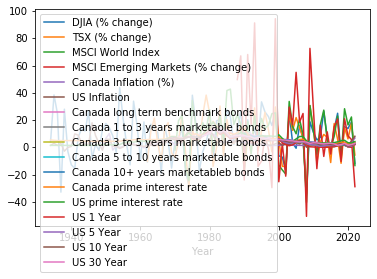

In [5]:
summary[[c for c in summary.columns if c not in ["Year"]]].plot()
summary.mean()

In [6]:
rate_values = [(i/10-2) for i in range(120)]

# Prime vs. inflation - ignore

In [7]:
summary["US prime over inflation"] = ((summary["US prime interest rate"]/100)-(summary["US Inflation"]/100))*100
summary["US returns over inflation"] = 1+(summary["DJIA (% change)"]/100)-(summary["US Inflation"]/100)
summary["US prime over inflation ratio"] = (summary["US prime interest rate"]/100 + 1)/(summary["US Inflation"]/100 + 1)-1
#summary[["US prime interest rate", "US Inflation"]].plot()
#summary[["US prime over inflation", "US Inflation"]].plot(figsize=(12,4))
data = [i for i in summary["US prime over inflation"].values if not math.isnan(i)]
ioi_us_a, ioi_us_loc, ioi_us_scale = scipy.stats.gamma.fit(data)
ioi_us_m = lambda x : scipy.stats.gamma.pdf(x, ioi_us_a, loc=ioi_us_loc, scale=ioi_us_scale)
plt.figure()
plt.hist(data)
plt.plot(rate_values, [ioi_us_m(x)*len(data) for x in rate_values])
plt.title("US prime over inflation, data vs model")
scipy.stats.gamma.ppf(.5, ioi_us_a, loc=ioi_us_loc, scale=ioi_us_scale)

-15.045926448358571

375.56992161727635 -52.69837448545647


3.254092858614726

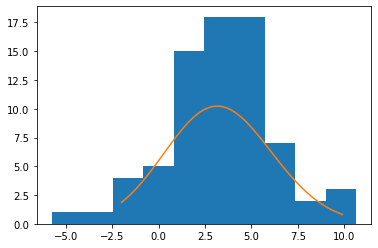

In [8]:
summary["Canada prime over inflation"] = ((summary["Canada prime interest rate"]/100)-(summary["Canada Inflation (%)"]/100))*100
summary["Canada prime over inflation ratio"] = (summary["Canada prime interest rate"]/100 + 1)/(summary["Canada Inflation (%)"]/100 + 1)-1
summary["Canada returns over inflation"] = (summary["TSX (% change)"]/100 + 1)-(summary["Canada Inflation (%)"]/100 + 1)
#summary[["Canada prime over inflation", "Canada prime over inflation ratio"]].plot(figsize=(12,4))
#summary[["Canada prime over inflation", "Canada Inflation (%)"]].plot(figsize=(12,4))
data = [i for i in summary["Canada prime over inflation"].values if not math.isnan(i)]
ioi_ca_a, ioi_ca_loc, ioi_ca_scale = scipy.stats.gamma.fit(data)
print(ioi_ca_a, ioi_ca_loc)
ioi_ca_m = lambda x : scipy.stats.gamma.pdf(x, ioi_ca_a, loc=ioi_ca_loc, scale=ioi_ca_scale)
plt.figure()
plt.hist(data)
plt.plot(rate_values, [ioi_ca_m(x)*len(data) for x in rate_values])
scipy.stats.gamma.ppf(.5, ioi_ca_a, loc=ioi_ca_loc, scale=ioi_ca_scale)

In [9]:
data = [i for i in list(summary["Canada prime over inflation"].values) + list(summary["US prime over inflation"].values) if not math.isnan(i)]
ioi_na_a, ioi_na_loc, ioi_na_scale = scipy.stats.gamma.fit(data)
ioi_na_m = lambda x : scipy.stats.gamma.pdf(x, ioi_na_a, loc=ioi_na_loc, scale=ioi_na_scale)
ioi_na2_m = lambda x : scipy.stats.gamma.pdf(x, statistics.mean([ioi_ca_a, ioi_us_a]), loc=statistics.mean([ioi_ca_loc, ioi_us_loc]), scale=statistics.mean([ioi_ca_scale, ioi_us_scale]))
plt.figure()
plt.hist(data)
plt.plot(rate_values, [ioi_na_m(x)*len(data) for x in rate_values])
plt.plot(rate_values, [ioi_na2_m(x)*len(data) for x in rate_values])
plt.plot(rate_values, [ioi_ca_m(x)*len(data) for x in rate_values])
plt.plot(rate_values, [ioi_us_m(x)*len(data) for x in rate_values])
#scipy.stats.gamma.ppf(.5, ioi_na_a, loc=ioi_na_loc, scale=ioi_na_scale).mean()


# Canada vs. US Inflation

In [10]:
summary[["US Inflation", "Canada Inflation (%)"]].plot()

# Canada vs. US returns

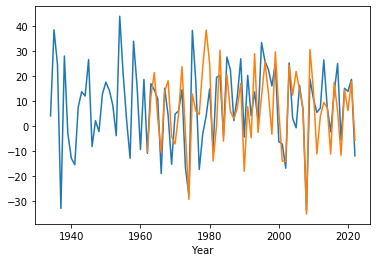

In [11]:
summary["DJIA (% change)"].plot()
summary["TSX (% change)"].plot()

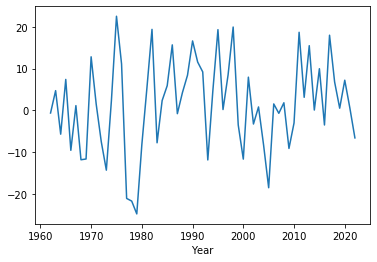

In [12]:
((100*((summary["DJIA (% change)"] + 100)/(summary["TSX (% change)"] + 100)))-100).plot()
#summary[["Canada-to-US returns"]].plot()

# Developed markets parameter selection

## Normal distribution

In [13]:
#summary["DJIA (% change)"].values
(us_mu, us_sigma) = scipy.stats.norm.fit([v for v in summary["DJIA (% change)"].values if not math.isnan(v)])
(ca_mu, ca_sigma) = scipy.stats.norm.fit([v for v in summary["TSX (% change)"].values if not math.isnan(v)])
(na_mu, na_sigma) = scipy.stats.norm.fit([v for v in list(summary["DJIA (% change)"].values) + list(summary["TSX (% change)"].values) if not math.isnan(v)])
(statistics.mean([us_mu, ca_mu]),
statistics.mean([us_sigma, ca_sigma]))
na_mu, na_sigma

(7.456898685663142, 15.634286862310905)

## Log-normal distribution

### Model

In [14]:
data = [v for v in list(((summary["DJIA (% change)"]+100)/100).values) + list(((summary["TSX (% change)"]+100)/100).values) if not math.isnan(v)]
(d_na_gs, d_na_gloc, d_na_gscale) = scipy.stats.lognorm.fit(data)
model = lambda x : scipy.stats.lognorm(x, d_na_gs, loc=d_na_gloc, scale=d_na_gscale)
(d_na_gs, d_na_gloc, d_na_gscale)

(0.0042966656032143915, -35.311793414910156, 36.38682272187617)

### Past vs Sample

In [15]:
plt.plot(summary["DJIA (% change)"])
plt.plot([i for i in range(current_year, current_year+len(summary["DJIA (% change)"]))],
    [(i-1)*100 for i in scipy.stats.lognorm.rvs(d_na_gs, loc=d_na_gloc, scale=d_na_gscale, size=len(summary["DJIA (% change)"]))])

# Developed vs Emerging

## Data

In [16]:
summary[~summary["MSCI Emerging Markets (% change)"].isna()][["DJIA (% change)", "TSX (% change)", "MSCI World Index", "MSCI Emerging Markets (% change)"]].plot()

## Parameter selection

In [17]:
calculated = (summary["MSCI Emerging Markets (% change)"]+100)/(summary["MSCI World Index"]+100)
data = [c for c in calculated.values if not np.isnan(c)]
eod_gs, eod_gloc, eod_gscale = scipy.stats.lognorm.fit(data)
eod_model = lambda x : scipy.stats.lognorm.pdf(x, eod_gs, loc=eod_gloc, scale=eod_gscale)

## Emerging - Past vs Sample

In [18]:
size = len(summary[~summary["MSCI Emerging Markets (% change)"].isna()])
plt.plot(summary["MSCI Emerging Markets (% change)"])
plt.plot(
    range(current_year, current_year+size),
    [(d*eod-1)*100 for d, eod in zip(scipy.stats.lognorm.rvs(d_na_gs, loc=d_na_gloc, scale=d_na_gscale, size=size),
    scipy.stats.lognorm.rvs(eod_gs, loc=eod_gloc, scale=eod_gscale, size=size))])

# Inflation parameter selection

## Canada

In [19]:
data = [(v+100)/100 for v in summary["Canada Inflation (%)"].values if not math.isnan(v)]
#gmean = np.product(data)**(1/len(data))
#data = [i/gmean for i in data]
inf_ca_gs, inf_ca_gloc, inf_ca_gscale = scipy.stats.lognorm.fit(data)
inf_ca_m = lambda x : scipy.stats.lognorm.pdf(x, inf_ca_gs, loc=inf_ca_gloc, scale=inf_ca_gscale)
plt.figure()
h = plt.hist(data, bins=25)
h_area = (h[1][1]-h[1][0]) * len(data)
X=np.linspace(scipy.stats.lognorm.ppf(0.01, inf_ca_gs, loc=inf_ca_gloc, scale=inf_ca_gscale), scipy.stats.lognorm.ppf(0.99, inf_ca_gs, loc=inf_ca_gloc, scale=inf_ca_gscale), len(data))
plt.plot(X, [inf_ca_m(x)*h_area for x in X])
print(inf_ca_gs, inf_ca_gloc, inf_ca_gscale)
(scipy.stats.lognorm(inf_ca_gs, loc=inf_ca_gloc, scale=inf_ca_gscale).mean(),
 scipy.stats.lognorm.mean(inf_ca_gs, loc=0, scale=1))


0.3716117104141963 0.9605756137792183 0.06858578787586414


(1.0340644106522983, 1.0714872446473889)

## US

In [20]:
data = [(v+100)/100 for v in summary["US Inflation"].values if not math.isnan(v)]
inf_us_gs, inf_us_gloc, inf_us_gscale = scipy.stats.lognorm.fit(data)
inf_us_m = lambda x : scipy.stats.lognorm.pdf(x, inf_us_gs, loc=inf_us_gloc, scale=inf_us_gscale)
plt.figure()
h = plt.hist(data, bins=25)
h_area = (h[1][1]-h[1][0]) * len(data)
x=np.linspace(scipy.stats.lognorm.ppf(0.01, inf_us_gs, loc=inf_us_gloc, scale=inf_us_gscale), scipy.stats.lognorm.ppf(0.99, inf_us_gs, loc=inf_us_gloc, scale=inf_us_gscale), len(data))
plt.plot(x, [inf_us_m(x_)*h_area for x_ in x])
print(inf_us_gs, inf_us_gloc, inf_us_gscale)

0.3239797094540615 0.9421203370851983 0.08896266009312508


## Combined Canada & US

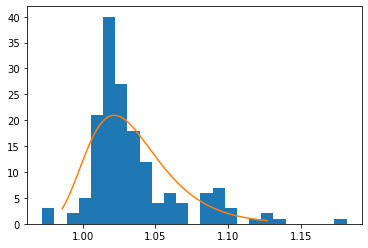

In [21]:
data = [(v+100)/100 for v in (list(summary["US Inflation"].values) + list(summary["Canada Inflation (%)"].values)) if not math.isnan(v)]
inf_na_gs, inf_na_gloc, inf_na_gscale = scipy.stats.lognorm.fit(data)
inf_na_m = lambda x : scipy.stats.lognorm.pdf(x, inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale)
plt.figure()
h = plt.hist(data, bins=25)
h_area = (h[1][1]-h[1][0]) * len(data)
x=np.linspace(scipy.stats.lognorm.ppf(0.01, inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale), scipy.stats.lognorm.ppf(0.99, inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale), len(data))
plt.plot(x, [inf_na_m(x_)*h_area for x_ in x])

## Canada/US/N.Amer. comparison

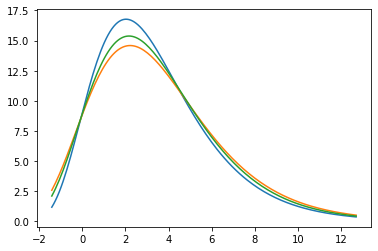

In [22]:
plt.figure()
plt.plot([x_*100-100 for x_ in x], [scipy.stats.lognorm.pdf(x, inf_ca_gs, loc=inf_ca_gloc, scale=inf_ca_gscale) for x in x])
plt.plot([x_*100-100 for x_ in x], [scipy.stats.lognorm.pdf(x, inf_us_gs, loc=inf_us_gloc, scale=inf_us_gscale) for x in x])
plt.plot([x_*100-100 for x_ in x], [scipy.stats.lognorm.pdf(x, inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale) for x in x])

# Fixed over inflation parameter selection

## Canada data

<Figure size 432x288 with 0 Axes>

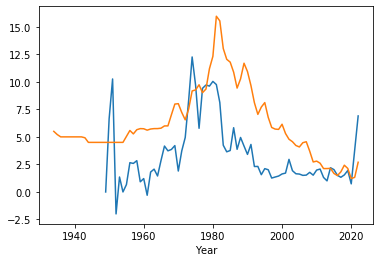

In [23]:
plt.figure()
summary[["Canada long term benchmark bonds", "Canada 1 to 3 years marketable bonds", "Canada 3 to 5 years marketable bonds", "Canada 5 to 10 years marketable bonds", "Canada 10+ years marketableb bonds", "Canada prime interest rate"]].plot()
plt.figure()
summary["Canada Inflation (%)"].plot()
summary[["Canada long term benchmark bonds", "Canada 1 to 3 years marketable bonds", "Canada 3 to 5 years marketable bonds", "Canada 5 to 10 years marketable bonds", "Canada 10+ years marketableb bonds", "Canada prime interest rate"]].mean(axis=1).plot()

## Canada difference vs ratio

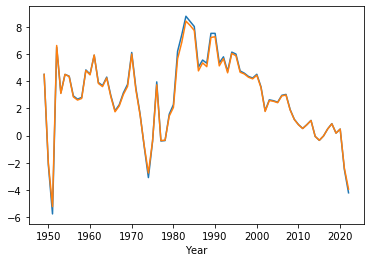

In [24]:
(summary[["Canada long term benchmark bonds", "Canada 1 to 3 years marketable bonds", "Canada 3 to 5 years marketable bonds", "Canada 5 to 10 years marketable bonds", "Canada 10+ years marketableb bonds", "Canada prime interest rate"]].mean(axis=1)-summary["Canada Inflation (%)"]).plot()
(((summary[["Canada long term benchmark bonds", "Canada 1 to 3 years marketable bonds", "Canada 3 to 5 years marketable bonds", "Canada 5 to 10 years marketable bonds", "Canada 10+ years marketableb bonds", "Canada prime interest rate"]].mean(axis=1)+100)/(summary["Canada Inflation (%)"]+100))*100-100).plot()

## Canada lag behind inflation

68
0 1.0260291619128878
1 1.0223737291138812
2 1.0205688883810828
3 1.0207221926096122
4 1.0231364249166504
5 1.0243072548553438
6 1.0246492936584344
7 nan


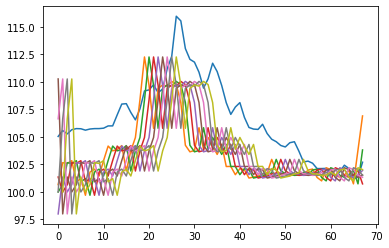

In [25]:
tests=6
a = 100+summary["Canada Inflation (%)"]
b = (100+summary[["Canada long term benchmark bonds", "Canada 1 to 3 years marketable bonds", "Canada 3 to 5 years marketable bonds", "Canada 5 to 10 years marketable bonds", "Canada 10+ years marketableb bonds", "Canada prime interest rate"]]).mean(axis=1)
testable = min(len(a[~a.isna()])-tests, len(b[~b.isna()]))
print(testable)
plt.figure()
b = b.values[-testable:]
plt.plot(b)
for shift in range(0,8):
    a_ = a.values[-testable-shift:-shift if shift > 0 else len(a)]
    plt.plot(a_)
    r = scipy.stats.gstd([n/m for m, n in zip(a_, b)])
    #print(max([d_*d_ for d_ in d]))
    print(shift, r)#math.pow(np.product(d), 1/len(d)), np.mean(d), math.sqrt(sum([d_*d_ for d_ in d])/len(d)))

## US data

<Figure size 432x288 with 0 Axes>

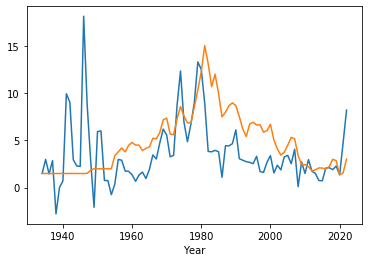

In [26]:
plt.figure()
summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year", "US prime interest rate"]].plot()
plt.figure()
summary["US Inflation"].plot()
summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year", "US prime interest rate"]].mean(axis=1).plot()

## US difference vs ratio

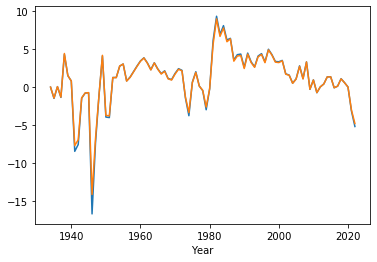

In [27]:
(summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year", "US prime interest rate"]].mean(axis=1)-summary["US Inflation"]).plot()
(((summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year", "US prime interest rate"]].mean(axis=1)+100)/(summary["US Inflation"]+100))*100-100).plot()

## US lag behind inflation

In [28]:
tests=6
a = 100+summary["US Inflation"]
b = (100+summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year", "US prime interest rate"]]).mean(axis=1)
testable = min(len(a[~a.isna()])-tests, len(b[~b.isna()]))
print(testable)
plt.figure()
b = b.values[-testable:]
plt.plot(b)
for shift in range(0,8):
    a_ = a.values[-testable-shift:-shift if shift > 0 else len(a)]
    plt.plot(a_)
    r = scipy.stats.gstd([n/m for m, n in zip(a_, b)])
    #print(max([d_*d_ for d_ in d]))
    print(shift, r)#math.pow(np.product(d), 1/len(d)), np.mean(d), math.sqrt(sum([d_*d_ for d_ in d])/len(d)))

83
0 1.035507981729256
1 1.0335570842036268
2 1.033916692920582
3 1.034535732863453
4 1.0342225863331873
5 1.0341821152248878
6 1.0344279064376167
7 1.0346402683505291


## Parameter selection

0.010351768805948413 -1.6481000652231903 2.6715897066554692 1.023489641432279


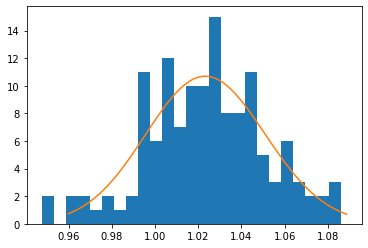

In [29]:
data = [v for v in (list(((100+summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year"]]).mean(axis=1)/(100+summary["US Inflation"])).values) +
                    list(((100+summary[["Canada long term benchmark bonds", "Canada 1 to 3 years marketable bonds", "Canada 3 to 5 years marketable bonds", "Canada 5 to 10 years marketable bonds", "Canada 10+ years marketableb bonds", "Canada prime interest rate"]]).mean(axis=1)/(100+summary["Canada Inflation (%)"])).values)) if not math.isnan(v)]
foi_na_gs, foi_na_gloc, foi_na_gscale = scipy.stats.lognorm.fit(data)
foi_na_m = lambda x : scipy.stats.lognorm.pdf(x, foi_na_gs, loc=foi_na_gloc, scale=foi_na_gscale)
plt.figure()
h = plt.hist(data, bins=25)
h_area = (h[1][1]-h[1][0]) * len(data)
X = np.linspace(scipy.stats.lognorm.ppf(0.01, foi_na_gs, loc=foi_na_gloc, scale=foi_na_gscale),
                scipy.stats.lognorm.ppf(0.99, foi_na_gs, loc=foi_na_gloc, scale=foi_na_gscale), 100)
plt.plot(X, [foi_na_m(x)*h_area for x in X])
print(foi_na_gs, foi_na_gloc, foi_na_gscale, scipy.stats.lognorm(foi_na_gs, loc=foi_na_gloc, scale=foi_na_gscale).ppf(.5))


## Fixed - Past vs sample

In [30]:
plt.figure()
plt.plot([y for y in range(current_year-len(summary), current_year)],
    ((100+summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year"]]).mean(axis=1)/(100+summary["US Inflation"])).values)
r = scipy.stats.lognorm.rvs(foi_na_gs, loc=foi_na_gloc, scale=foi_na_gscale, size=len(summary))
plt.plot([y for y in range(current_year, current_year+len(summary))],
         r)

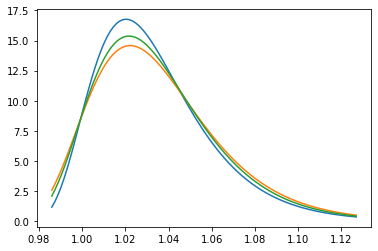

In [31]:
plt.figure()
X = np.linspace(scipy.stats.lognorm.ppf(0.01, inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale),
                scipy.stats.lognorm.ppf(0.99, inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale), 100)
plt.plot(X, [scipy.stats.lognorm.pdf(x, inf_ca_gs, loc=inf_ca_gloc, scale=inf_ca_gscale) for x in X])
plt.plot(X, [scipy.stats.lognorm.pdf(x, inf_us_gs, loc=inf_us_gloc, scale=inf_us_gscale) for x in X])
plt.plot(X, [scipy.stats.lognorm.pdf(x, inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale) for x in X])

# All parameters selected

### For static/simulated_returns.parameters.json

In [32]:
parameters = {
	"developed": {
		"distribution": {
            "s": d_na_gs,
			"loc": d_na_gloc,
			"scale": d_na_gscale
		},
        "facts": {
            "mu": scipy.stats.lognorm(d_na_gs, loc=d_na_gloc, scale=d_na_gscale).mean(),
            "sigma": scipy.stats.lognorm(d_na_gs, loc=d_na_gloc, scale=d_na_gscale).var()**.5
        }
	},
	"emerging-over-developed": {
		"distribution": {
            "s": eod_gs,
			"loc": eod_gloc,
			"scale": eod_gscale
		},
        "facts": {
            "mu": scipy.stats.lognorm(eod_gs, loc=eod_gloc, scale=eod_gscale).mean(),
            "sigma": scipy.stats.lognorm(eod_gs, loc=eod_gloc, scale=eod_gscale).var()**.5
        }
	},
	"inflation": {
		"distribution": {
			"s": inf_na_gs,
			"loc": inf_na_gloc,
			"scale": inf_na_gscale
		},
		"algorithm": {
			"initial": 1.069,
			"proposal_scale": 0.015
		},
        "facts": {
            "mu": scipy.stats.lognorm(inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale).mean(),
            "sigma": scipy.stats.lognorm(inf_na_gs, loc=inf_na_gloc, scale=inf_na_gscale).var()**.5
        }
	},
	"fixed-over-inflation": {
		"distribution": {
			"s": foi_na_gs,
			"loc": foi_na_gloc,
			"scale": foi_na_gscale
		},
        "facts": {
            "mu": scipy.stats.lognorm(foi_na_gs, loc=foi_na_gloc, scale=foi_na_gscale).mean(),
            "sigma": scipy.stats.lognorm(foi_na_gs, loc=foi_na_gloc, scale=foi_na_gscale).var()**.5
        }
	}
}
print(json.dumps(parameters, indent=2))

{
  "developed": {
    "distribution": {
      "s": 0.0042966656032143915,
      "loc": -35.311793414910156,
      "scale": 36.38682272187617
    },
    "facts": {
      "mu": 1.0753651831836848,
      "sigma": 0.15634417432682457
    }
  },
  "emerging-over-developed": {
    "distribution": {
      "s": 0.223586979754944,
      "loc": 0.007370359538452727,
      "scale": 1.0045083638759138
    },
    "facts": {
      "mu": 1.0373034098209486,
      "sigma": 0.23318780479894582
    }
  },
  "inflation": {
    "distribution": {
      "s": 0.33363400929443665,
      "loc": 0.9481354040669698,
      "scale": 0.08221313835727792
    },
    "algorithm": {
      "initial": 1.069,
      "proposal_scale": 0.015
    },
    "facts": {
      "mu": 1.0350539085352628,
      "sigma": 0.02982498005765362
    }
  },
  "fixed-over-inflation": {
    "distribution": {
      "s": 0.010351768805948413,
      "loc": -1.6481000652231903,
      "scale": 2.6715897066554692
    },
    "facts": {
      "mu": 1.

# Historical data

### For static/historical.json

In [33]:
historical = {
    "inflation": summary["US Inflation"].to_dict(),
    "fixed": summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year"]].mean(axis=1)[~summary[["US 1 Year", "US 5 Year", "US 10 Year", "US 30 Year"]].mean(axis=1).isna()].to_dict(),
    "developed": summary["DJIA (% change)"].to_dict(),
    "emerging": summary[~summary["MSCI Emerging Markets (% change)"].isna()]["MSCI Emerging Markets (% change)"].to_dict()
}
print(json.dumps(historical, indent=2))

{
  "inflation": {
    "1934": 1.5151515151515156,
    "1935": 2.985074626865668,
    "1936": 1.4492753623188293,
    "1937": 2.857142857142861,
    "1938": -2.7777777777777857,
    "1939": 0.0,
    "1940": 0.7142857142857082,
    "1941": 9.929078014184398,
    "1942": 9.032258064516114,
    "1943": 2.958579881656803,
    "1944": 2.2988505747126453,
    "1945": 2.247191011235955,
    "1946": 18.13186813186813,
    "1947": 8.837209302325576,
    "1948": 2.991452991453002,
    "1949": -2.0746887966805048,
    "1950": 5.932203389830505,
    "1951": 6.0,
    "1952": 0.7547169811320771,
    "1953": 0.7490636704119851,
    "1954": -0.743494423791816,
    "1955": 0.37453183520599964,
    "1956": 2.985074626865668,
    "1957": 2.8985507246376727,
    "1958": 1.7605633802816953,
    "1959": 1.730103806228385,
    "1960": 1.3605442176870781,
    "1961": 0.6711409395973078,
    "1962": 1.3333333333333286,
    "1963": 1.6447368421052744,
    "1964": 0.9708737864077648,
    "1965": 1.92307692307691